# Introduction:
#### A dataset is a collection of related,discrete items of related data that may be accessed individually or in combination or managed as a whole entity.
Data sets are usually presented in tabular form.Each column represents a particular variable.Each row corresponds to a given member of the dataset in question.It list values for each of the variables.The main purpose of dataset is to act as a cheap local copy of the data we care about so that we don't have to keep on making expensive high-latency calls to the database.
In this report i'll analyse the data of various datasets created for last 5 years and find some answers to the questions which rises on deciphering the data present in rows and columns.The dataset consist of columns which tells the titles of the datasets created,thier descriptions,downloads,views,discussions,upvotes etc.

# objective:
In this task i'll be using different pandas documentations and methods to answer the following questions given below about the dataset of datasets.
Q1. Which dataset has maximum upvotes?  
Q2. Which datasets are of 0 size and on which date these were updated?  
Q3. How many featured datasets are there?  
Q4. How many datasets are featured as well as super_featured?  
Q5. Which year maximum datasets were updated?  
Q6. How many owners have CC0 license?Find their name as well.  
Q7. How many datasets are downloaded each year?  
Q8. What is the average views of datasets each year?Plot a graph to compare each year's data.  
Q9. How many kernels are active each year?  
Q10. What is the total number of downloads and views in each month in the year 2016?


In order to be able to work with the data,we'll need to read the csv file into a Pandas DataFrame.A DataFrame is away to represent and work with tabular data.Tabular data has rows and columns,just like our csv file.In order to read in the data,we'll need to use the pandas.read_csv function.Thos function will take in a csv file and return a DataFrame.Now we'll follow the following steps:
1.) Import the pandas library.We'll rename it to pd so it's faster to type.
2.) Read kaggle_datasets.csv into a DataFrame and assign the result to df.

In [2]:
import pandas as pd
df=pd.read_csv("kaggle_datasets.csv")
df

,title,description,url,owner,kernels,discussions,views,downloads,last_updated,license,size,featured,super_featured,upvotes
0,Trending YouTube Video Statistics (UPDATED),"Daily statistics (views, likes, category, tags...",https://www.kaggle.com/datasnaek/youtube-new,Mitchell J,3,4,9484,1668,2018-01-16,CC0,3.508768e+07,1,0,46
1,7ecb8f4fe2ece9f4c8ffd23af10c310f,NaN,https://www.kaggle.com/veralei/7ecb8f4fe2ece9f...,Vera Lei,0,0,55,2,2018-01-16,Other,1.272644e+08,0,0,0
2,Atom Dataset,Dataset with atom features,https://www.kaggle.com/chfly2000/nomad2018-ato...,chfly2000,0,0,26,1,2018-01-16,Other,0.000000e+00,0,0,0
3,tmptmp,NaN,https://www.kaggle.com/ilyaivanchenko/tmptmp,snow2011,0,0,12,1,2018-01-16,CC0,1.635900e+06,0,0,0
4,Lab 1 Matrix,NaN,https://www.kaggle.com/tjb5670/lab-1-matrix,Tjb5670,0,0,7,1,2018-01-16,CC0,1.800000e+01,0,0,0
5,Koppen-Geiger climate classification,A world map shapefile from data observed durin...,https://www.kaggle.com/nighrtwing/koppen-geige...,gabro,0,0,6,0,2018-01-16,Other,7.775660e+05,0,0,1
6,Trial Dataset,NaN,https://www.kaggle.com/prashanth1994/trial-dat...,Prashanth Sekar,0,0,5,0,2018-01-16,Other,4.043810e+05,0,0,0
7,glove_embedding_weights,NaN,https://www.kaggle.com/zymiao/glove-embedding-...,Zuoyu Miao,0,0,5,0,2018-01-16,CC0,1.378476e+08,0,0,1
8,20180116083816,NaN,https://www.kaggle.com/mic771112/20180116083816,Shanger Lin,0,0,5,0,2018-01-16,Other,8.071716e+06,0,0,0
9,final_best14,NaN,https://www.kaggle.com/shivrajp/final-best14,Getting_started,0,0,4,1,2018-01-16,CC0,1.841620e+05,0,0,0


In [9]:
df.dtypes

title              object
description        object
url                object
owner              object
kernels             int64
discussions         int64
views               int64
downloads           int64
last_updated       object
license            object
size              float64
featured            int64
super_featured      int64
upvotes             int64
dtype: object

Firstly,i've checked the data types of each column by using df.dtypes which returns a series with the data type of each column.Columns with mixed types are stored with the object dtype,so as the column last_updated is.It is not representing as an array of datetimes,may be because of mixture of timezones as the different datasets are updated from different zones of world,the column last_updated returned unaltered as an object datatype.To parse the column last_updated,i'll simply pass in parse_dates=["last updated"] to turn it into datetime dtype and now i"ll check it again.

In [3]:
n_df=pd.read_csv("kaggle_datasets.csv",parse_dates=["last_updated"])
n_df.dtypes

title                     object
description               object
url                       object
owner                     object
kernels                    int64
discussions                int64
views                      int64
downloads                  int64
last_updated      datetime64[ns]
license                   object
size                     float64
featured                   int64
super_featured             int64
upvotes                    int64
dtype: object

Here the dtype of last_updated is successfully converted into datetime.Now i'll apply different dict and methods to find answer of the given above questions.

### Q1. Which dataset has maximum upvotes?

## Answer 1:
For answering the question 1,i'll use df.max( ) method which returns the maximum values for the requested axis.And as i also want to know which dataset has the maximum upvotes, i'll specify df[['title', 'upvotes']] before the max method,so that it will print the title and the maximum upvotes as well.

In [5]:
n_df[['title','upvotes']][n_df['upvotes']==n_df['upvotes'].max()]

,title,upvotes
7822,Credit Card Fraud Detection,1131


### Q2. Which datasets are of zero size and on which date these were updated?

## Answer 2:
I'll use the min() method to answer question 2 as the minimum value of size can be zero only,it can't be a negative value.Similar to the method of answer 1 again i'll specify df[['title','last_updated','size']] before the min() code so it will print the title of required title and the required date.

In [38]:
n_df[['title','last_updated','size']][n_df['size']==n_df['size'].min()]

,title,last_updated,size
2,Atom Dataset,2018-01-16,0.0
66,qixiang109merge29,2018-01-15,0.0
67,qixiang109merge30,2018-01-15,0.0
214,example2,2018-01-14,0.0
280,Facial_Key_Points,2018-01-13,0.0
789,submit,2018-01-08,0.0
3521,script,2017-11-26,0.0
3550,porto_seguro,2017-11-25,0.0
3646,traincsv,2017-11-23,0.0
4493,Training data w imfs,2017-11-09,0.0


### Q3. How many featured datasets are there?

## Answer 3:
To answer the question 3,i'll be applying the pandas.series.value_counts method with return a series containing counts of unique values.

In [39]:
n_df['featured'].value_counts()

0    6783
1    1253
Name: featured, dtype: int64

Here 0 means False and 1 means True i.e, 1 denotes the datasets which are featured.So we get the result that 1253 datasets are featured.

### Q4. How many datasets are featured as well as super_featured?

## Answer 4:
I'll use logical operator i.e, and operator to find the answer of question 4.The use of 'and' operator in this answer is that i'll combine two conditions and find which datasets are are featured and super_featured as well.

In [6]:
a=n_df[(n_df['featured']==1)&(n_df['super_featured'])]
a

,title,description,url,owner,kernels,discussions,views,downloads,last_updated,license,size,featured,super_featured,upvotes
242,Zillow Economics Data,Turning on the lights in housing research.,https://www.kaggle.com/zillow/zecon,Zillow,21,6,26201,2353,2018-01-13,Other,5.276808e+08,1,1,162
2939,Fashion MNIST,"An MNIST-like dataset of 70,000 28x28 labeled ...",https://www.kaggle.com/zalando-research/fashio...,Zalando Research,94,5,41173,4269,2017-12-07,Other,7.214986e+07,1,1,211
3479,Wine Reviews,"130k wine reviews with variety, location, wine...",https://www.kaggle.com/zynicide/wine-reviews,zackthoutt,68,6,48227,6940,2017-11-27,CC4,5.333622e+07,1,1,279
4157,YouTube Faces With Facial Keypoints,Videos of Celebrity Faces with Facial Keypoint...,https://www.kaggle.com/selfishgene/youtube-fac...,Selfish Gene,3,1,14804,908,2017-11-14,CC0,1.051022e+10,1,1,114
5024,"Kaggle ML and Data Science Survey, 2017",A big picture view of the state of data scienc...,https://www.kaggle.com/kaggle/kaggle-survey-2017,Kaggle,234,10,84947,8031,2017-10-27,ODbL,2.922592e+07,1,1,529
5757,TED Talks,Data about TED Talks on the TED.com website un...,https://www.kaggle.com/rounakbanik/ted-talks,Rounak Banik,18,2,41999,4274,2017-09-25,CC4,3.610592e+07,1,1,154
5777,(MBTI) Myers-Briggs Personality Type Dataset,Includes a large number of people's MBTI type ...,https://www.kaggle.com/datasnaek/mbti-type,Mitchell J,11,2,32093,3187,2017-09-22,CC0,6.285649e+07,1,1,160
5911,1.88 Million US Wildfires,24 years of geo-referenced wildfire records,https://www.kaggle.com/rtatman/188-million-us-...,Rachael Tatman,8,1,11414,1310,2017-09-13,CC0,7.957852e+08,1,1,64
6655,Global Terrorism Database,"More than 170,000 terrorist attacks worldwide,...",https://www.kaggle.com/START-UMD/gtd,START Consortium,596,37,174553,24409,2017-07-18,Other,1.509509e+08,1,1,710
6861,"Stack Overflow Developer Survey, 2017","A look into the lives of over 64,000 Stack Ove...",https://www.kaggle.com/stackoverflow/so-survey...,Stack Overflow,115,1,19586,2042,2017-06-15,ODbL,9.312006e+07,1,1,86


This method has given the whole dataframe of datasets which are featured and super_featured both,as a result.Also i've assigned the result to a variable 'a'.In order to find the number of such datasets i'll use the a['title'].count() method.I've specified only one column because every column is going to give same value and i just need how many such datasets are,so specifying only one column will do the job. 

In [34]:
a['title'].count()

20

### Q5. Which  year maximum datasets are created?

## Answer 5:
Now to answer the question 5,i'll use the method grouping and as i need the total record of each year,i'll specify the dict series.dt.year so that it return the year of the datetime.Also i'll apply agg('count') which will return the number datasets created each year.

In [7]:
n_df['last_updated'].groupby(n_df.last_updated.dt.year).agg('count')


last_updated
2015       1
2016     431
2017    6445
2018    1159
Name: last_updated, dtype: int64

The required result is obtained and clearly we can that in 2017,maximum datasets i.e, 6445 datasets are created and updated.

### Q6. How many owners have CC0 license?Find thier name as well.

## Answer 6:
I'll simply pass a condition to find the number of owner having CC0 license.Also,i'll specify the column owner so that the names of the owners can be obtained.

In [8]:
n_df[n_df['license']=='CC0']['owner']

0                                       Mitchell J
3                                         snow2011
4                                          Tjb5670
7                                       Zuoyu Miao
9                                  Getting_started
11                                           nailo
13                                        snow2011
14                                   Nick DiGiulio
16                                Faizal Abd Kadir
21                                   Itzik Yohanan
26                                 Getting_started
27                                        snow2011
29                                    JoshMcKenney
30                                          LeeYun
33                                 Getting_started
35                                Faizal Abd Kadir
38                                    Pragya Goyal
42                                        Ssvitian
44                                   John Bourassa
47                             

Here the Length denotes the number of owners having CC0 license which is obtained to be 3499.

### Q7. How many datasets are downloaded each year?

## Answer 7:
To answer question 7 i'll pass a condition which will find the range between 1st january to 31st december and assing this to another dummy dataframe.This step will be repeated four times as the data from 2015 to 2018 is in record,four times for four different years.In order to find the total downloads i'll calculate the sum of each year downloads by using dataframe.sum() method. 

In [9]:
f=n_df[(n_df['last_updated']>'2015-01-01')&(n_df['last_updated']<='2015-12-31')]
f["downloads"].sum()


4456

In [10]:
i=n_df[(n_df['last_updated']>'2016-01-01')&(n_df['last_updated']<='2016-12-31')]
i["downloads"].sum()

833803

In [11]:
s=n_df[(n_df['last_updated']>'2017-01-01')&(n_df['last_updated']<='2017-12-31')]
s["downloads"].sum()


953579

In [52]:
e=n_df[(n_df['last_updated']>'2018-01-01')&(n_df['last_updated']<='2018-12-31')]
e["downloads"].sum()

40074

### Q8. What is the average views of datasets each year?Plot a graph to compare each year's average data.

## Answer 8:
I'll use the dataframes created for different years to answer question 8 and simply calculate mean of views of each year by using mean() method.It has been asked to plot a graph as well,to do so i'll create a new dataframe with only two columns with will include year and the average views and then i'll import matplotlib.pyplot as plt to save time and plot a bar plot assigning year to x axis and average views to y axis.

In [50]:
f["views"].mean()

44372.0

In [49]:
i["views"].mean()

15364.661252900232

In [52]:
s["views"].mean()

1204.8294537554314

In [53]:
e["views"].mean()

337.09668755595345

In [54]:
import pandas as pd
raw_data=[[2015,44372],[2016,15364],[2017,1204],[2018,337]]
v_df=pd.DataFrame(raw_data,columns=['year','average_views'])
v_df

,year,average_views
0,2015,44372
1,2016,15364
2,2017,1204
3,2018,337


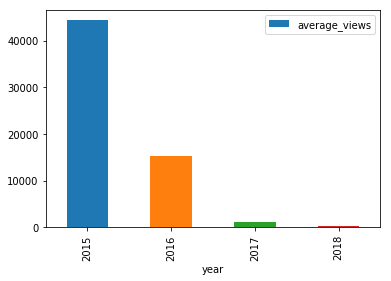

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
v_df.plot(kind='bar',x='year',y='average_views')
plt.show()

### Q9. How many kernels are active (i.e the value is non-zero) each year?

## Answer 9:
Question 9 has asked that how many kernels are active each year which means kernels having non-zero value.The answer for the same can be obtained by passing condition 'kernels'>0 and i'll use the count() method which will return the number of active kernels each year.

In [44]:
f['title'][f['kernels']>0].count()

1

In [50]:
i['title'][i['kernels']>0].count()

380

In [46]:
s['title'][s['kernels']>0].count()

2057

In [54]:
e['title'][e['kernels']>0].count()

143

In [57]:
import pandas as pd
data=[[1],[380],[2057],[143]]
k=pd.DataFrame(data,columns=['active_kernels'],index=[2015,2016,2017,2018])
k

,active_kernels
2015,1
2016,380
2017,2057
2018,143


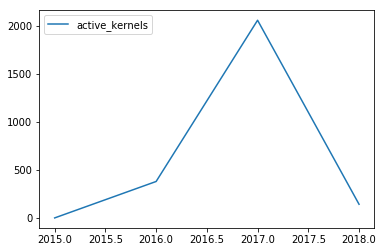

In [58]:
%matplotlib inline
k.plot()

### Q10. What is the total number of downloads and views of each month in the year 2016?

### Answer 10:
I'll apply series.dt.strftime() to answer question 10,as it returns an index of formatted strings specified by date formate.Here i'll specify the '%m' index as i want an month column in yhe dataframe to find the total number of downloads and views each month in the year 2016.

In [13]:
i['month']=pd.to_datetime(i['last_updated']).dt.strftime('%m')
i

/home/soumyajit-ipc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,title,description,url,owner,kernels,discussions,views,downloads,last_updated,license,size,featured,super_featured,upvotes,month
7604,India Water Quality Data,Government data related to the water quality o...,https://www.kaggle.com/venkatramakrishnan/indi...,Venkat Ramakrishnan,33,10,10823,1358,2016-12-31,Other,4.258892e+07,1,0,21,12
7605,Oyo rooms Delhi,Top oyo rooms in Delhi as present on 12 Dec 20...,https://www.kaggle.com/harshitagpt/oyorooms,HARSHITAGUPTA,1,1,1621,32,2016-12-31,Other,3.418000e+04,0,0,0,12
7606,Gender Development Index UNDP 2014,RANKING OF COUNTRIES,https://www.kaggle.com/nishantbhadauria/undata...,Nishant Bhadauria,1,1,1618,28,2016-12-31,Other,1.448000e+04,0,0,1,12
7607,Video Game Sales with Ratings,Video game sales from Vgchartz and correspondi...,https://www.kaggle.com/rush4ratio/video-game-s...,Rush Kirubi,183,16,57943,9943,2016-12-30,Other,1.618040e+06,1,0,139,12
7608,Smogon 6v6 Pokemon Tiers,Tiering of Smogon 6v6 Format (12/29/16),https://www.kaggle.com/notgibs/smogon-6v6-poke...,Gibs,2,1,1813,96,2016-12-30,CC0,3.629100e+04,0,0,6,12
7609,Pune Property Prices,Buying rates for a single quarter in 2016,https://www.kaggle.com/dynamic22/pune-property...,Amol Naik,3,1,1683,90,2016-12-30,Other,3.713100e+04,0,0,0,12
7610,1 million Sudoku games,1 million numpy array pairs of Sudoku games an...,https://www.kaggle.com/bryanpark/sudoku,Bryan Park,20,3,26099,1445,2016-12-29,CC0,1.640000e+08,1,0,65,12
7611,Indian Premier League CSV dataset,577 matches up to season 9,https://www.kaggle.com/harsha547/indian-premie...,HarshaVardhan,12,1,13819,2855,2016-12-29,Other,6.285762e+06,1,0,23,12
7612,Basic Classification Example with TensorFlow,This is an example of how to do classification...,https://www.kaggle.com/sergiogq/basic-classifi...,SergioGonzalez,10,0,10551,316,2016-12-29,ODbL,1.500000e+02,0,0,1,12
7613,Indian Premier League SQLite Database,"577 matches, players & teams attributes for In...",https://www.kaggle.com/harsha547/ipldatabase,HarshaVardhan,6,2,5490,475,2016-12-29,ODbL,1.282458e+07,0,0,9,12


Now the month column is successfully added to the datadframe,now i'll use grouping so that each month's data will form its own group and then use the sum() method to find the total downloads and views.I'll then apply %matplotlib inline for line plot with multiple columns.

In [99]:
columns=['title','downloads','views']
g=i.groupby(["month"])[columns]
g

In [100]:
p=g.sum()
p

,downloads,views
month,,
04,3317,27071
05,69013,454262
06,16823,156135
07,31669,283453
08,76826,648404
09,118029,823113
10,170100,1398882
11,260855,2149107
12,87171,681742


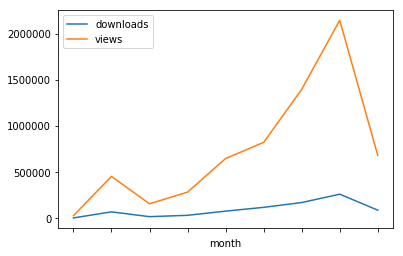

In [101]:
%matplotlib inline
p.plot()

# Conclusions:
1) There are maximum upvotes for dataset named as Credit Card Fraud Detection among all the datasets created since 2015.         
       
  2) The size zero of the datasets somehow indicates that these datasets doesn't contain any kind of data.These are empty datasets.  

3) Very less datasets are featured as compared to the total number of datasets created from 2015-2018.  
       
   4) In 2017,maximum datasets(i.e, 6445) were created and in 2015 only one dataset wast created as the record of only one day is given of year 2015.  

5) The maximum number of downloads is done in the year 2017.  

6) The average views of datasets have gradually decreased from 2016.This may be also beacause in 2018 only records upto january are obtained.  

7) The maximum active kernels are in 2017 .The active kernels has a rapid increment  till 2017 and after that it has decreased.      
      
 8) In 2016,the total views per month have increased gradually till the month november and decreased in the month of december whereas the line plot for download doesn't show any exterme increament or decreament to a large extent.It is always under 300000.  

9) Out of 8035 owners,3499 owners are having CC0 license.  